In [1]:
from src.tensor import Tensor
import src.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST
np.set_printoptions(suppress=True)

In [2]:
mndata = MNIST('./mnist_dataset/')
mndata.gz = True
mnist_x_train, mnist_y_train = mndata.load_training()
mnist_x_test, mnist_y_test = mndata.load_testing()
x_train = Tensor(list(mnist_x_train))
x_test = Tensor(list(mnist_x_test))
y_train = Tensor(list(mnist_y_train))
y_test = Tensor(list(mnist_y_test))

In [3]:

def normalize(x):
    mean = x.mean(axis=1).reshape((-1,1))
    std = x.std(axis=1).reshape((-1,1))
    return (x-mean) / std

In [4]:
rng = np.random.default_rng(seed=1)

# Scale down pixels from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

x_train = normalize(x_train)
x_test = normalize(x_test)

# OneHot label vectors
def onehot(vector):
    tmp = []
    for scalar in vector.data:
        tmp2 = [1 if i==scalar else 0 for i in range(10)]
        tmp.append(tmp2)
    return Tensor(tmp)
y_train = onehot(y_train)
y_test = onehot(y_test)

print(f'x_train={x_train.shape}, y_train={y_train.shape}')
print(f'x_test={x_test.shape}, y_test={y_test.shape}')

x_train=(60000, 784), y_train=(60000, 10)
x_test=(10000, 784), y_test=(10000, 10)


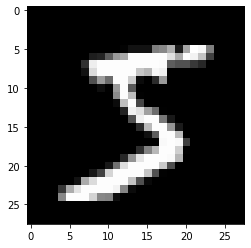

In [5]:
# Visualize X
img = np.array(x_train[0].tolist())
plt.imshow(img.reshape(28, 28),cmap='gray')
plt.show()

In [8]:
# Multinomial sampling with replacement
def draw_batch(batch_size): 
    draw = lambda: int(rng.random() * x_train.shape[0])
    batch = [draw() for _ in range(batch_size)]
    return x_train[batch], y_train[batch]

mlp = nn.MLP(inputs=784, hidden=[600, 300, 100, 50], outs=10)
losses = []

In [16]:
epochs = 500
batch_size = 100
lr = 0.005
for e in range(epochs):
    x, y = draw_batch(batch_size)
    out = mlp(x)

    loss = nn.nlll(out, y, reduction='mean')

    loss.backward()
    mlp.train(lr=lr)

    losses.append(loss.data.item())
    print(f'Epoch {e}: {loss.data.item()}')

Epoch 0: 3.7046486282924325
Epoch 1: 3.428828957983612
Epoch 2: 3.9430614105349133
Epoch 3: 4.1109739775234235
Epoch 4: 4.777698117231658
Epoch 5: 4.048092496345872
Epoch 6: 3.9409274360057553
Epoch 7: 4.377247560231163
Epoch 8: 3.9015356627973814
Epoch 9: 4.297990190243484
Epoch 10: 4.437991517566495
Epoch 11: 3.952456114160481
Epoch 12: 3.6526389610034578
Epoch 13: 4.292815512911306
Epoch 14: 3.9092283060573827
Epoch 15: 3.8266933304425805
Epoch 16: 3.9327755406764675
Epoch 17: 4.084153885439255
Epoch 18: 4.977049314739551
Epoch 19: 5.036596678440003
Epoch 20: 4.33409526538009
Epoch 21: 3.995480951067667
Epoch 22: 3.8705186464915413
Epoch 23: 4.047960989964852
Epoch 24: 3.3044535930859036
Epoch 25: 4.21832829727147
Epoch 26: 4.7933287539489
Epoch 27: 4.013125876736566
Epoch 28: 4.3715146435741445
Epoch 29: 3.9494896279578104
Epoch 30: 5.260755253772551
Epoch 31: 3.863631656521706
Epoch 32: 4.467390331783426
Epoch 33: 3.523461602883068
Epoch 34: 4.151029908379321
Epoch 35: 3.090210405

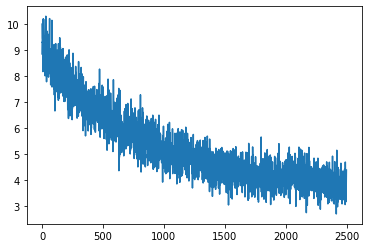

In [19]:
plt.plot(losses)
plt.show()

In [20]:
correct = 0
for i in range(len(x_test.data)):
    y = y_test[i]
    x = mlp(x_test[i])
    corr = np.argmax(y.data)
    predicted = np.argmax(x.data)
    if predicted == corr: correct += 1

print(f'Test accuracy: {(correct/len(x_test.data))*100}%')

Test accuracy: 37.44%
